<a href="https://colab.research.google.com/github/FranciscoConcha/FCC-Proyecto3/blob/main/SVMConKernelLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install mlxtend


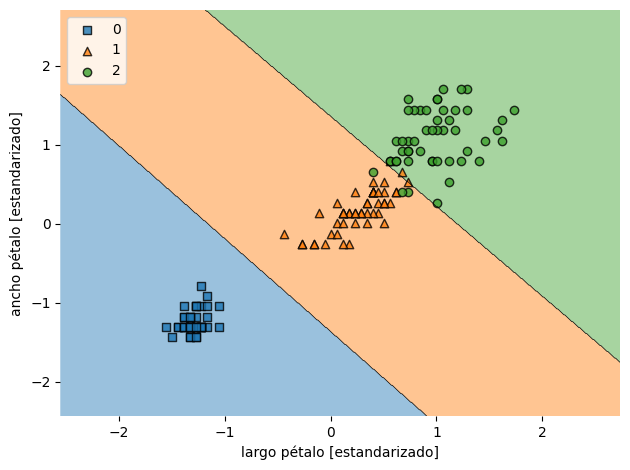

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np


# Cargar dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Usar solo 2 características
y = iris.target

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Estandarizar
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Concatenar para graficar
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Entrenar SVM
# Se separan en forma lineal dado al kernel.
# C es el parametro de regularización maximizando las muestras del margen mientras más bajo aumenta la regularización.
#
svm = SVC(kernel='linear', C=1.0, random_state=1)
# Entrnamos los datos
svm.fit(X_train_std, y_train)
# Imprimimos
plot_decision_regions(X_combined_std, y_combined,clf=svm)

plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Con kernel no lineal

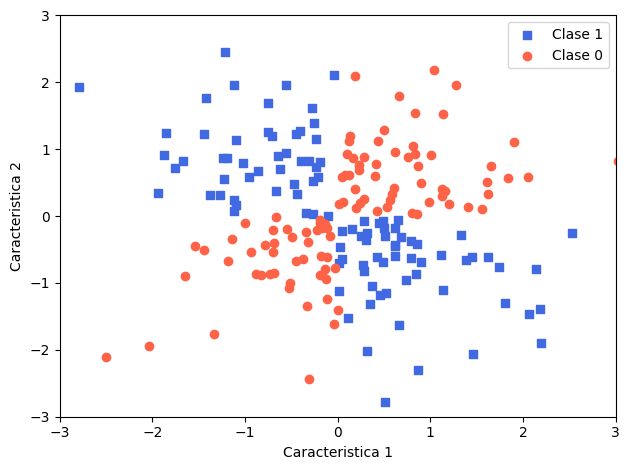

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
Y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)

y_xor = np.where(Y_xor,1,0)

plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='royalblue',marker='s', label='Clase 1')
plt.scatter(X_xor[y_xor==0,0],X_xor[y_xor==0,1],c='tomato',marker='o', label='Clase 0')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

plt.legend(loc='best')
plt.tight_layout()
plt.show()